In [1]:
%matplotlib inline
import os

import matplotlib as mpl
from matplotlib import style
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def discrete_cmap(N=6, base_cmap='Greens'):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N+1))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)

In [20]:
style.use('dark_background')

plt.rcParams['font.size'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.labelweight'] = 'regular'
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['figure.titlesize'] = 20

fixation_cmap = discrete_cmap()

def behavior(test_results, suptitle=None, save_as=None):
    # get data
    fix_path = os.path.join(test_results, 'examples', 'fixations_epoch_test.npy')
    fix = np.load(fix_path)

    images_path = os.path.join(test_results, 'examples', 'images_epoch_test.npy')
    images = np.load(images_path)
    
    true_lbl_path = os.path.join(test_results, 'true_lbl.npy')
    true_lbl = np.load(true_lbl_path)

    num_examples = fix.shape[0]
    true_lbl = true_lbl[:num_examples]
    
    fixes_by_digit = {}
    digits = range(10)
    for digit in digits:
        digit_inds = np.where(true_lbl == digit)[0]
        fixes_by_digit[digit] = fix[digit_inds]
    
    fig, ax = plt.subplots(5, 2)
    fig.set_size_inches(15,25)
    ax = ax.ravel()

    for digit in digits:
        fixes_this_digit = fixes_by_digit[digit]
        xx = fixes_this_digit[:,:,0]
        yy = fixes_this_digit[:,:,1]
        for x, y in zip(xx, yy):
            ax[digit].plot(x, y, color='gray', linewidth=0.5)
        xmean = xx.mean(axis=0)
        ymean = yy.mean(axis=0)
        xy = np.stack([xmean, ymean], axis=1)
        for ind, (start, stop) in enumerate(zip(xy[:-1], xy[1:])):
            x, y = zip(start, stop)
            ax[digit].plot(x, y, color=fixation_cmap(ind), 
                           linewidth=4, linestyle='--', marker='o')
        ax[digit].set_xlim([0, 28])
        ax[digit].set_ylim([0, 28])
        ax[digit].set_xlabel(f'digit = {digit}')
    
    if suptitle:
        fig.suptitle(suptitle)
    
    if save_as:
        plt.savefig(save_as)

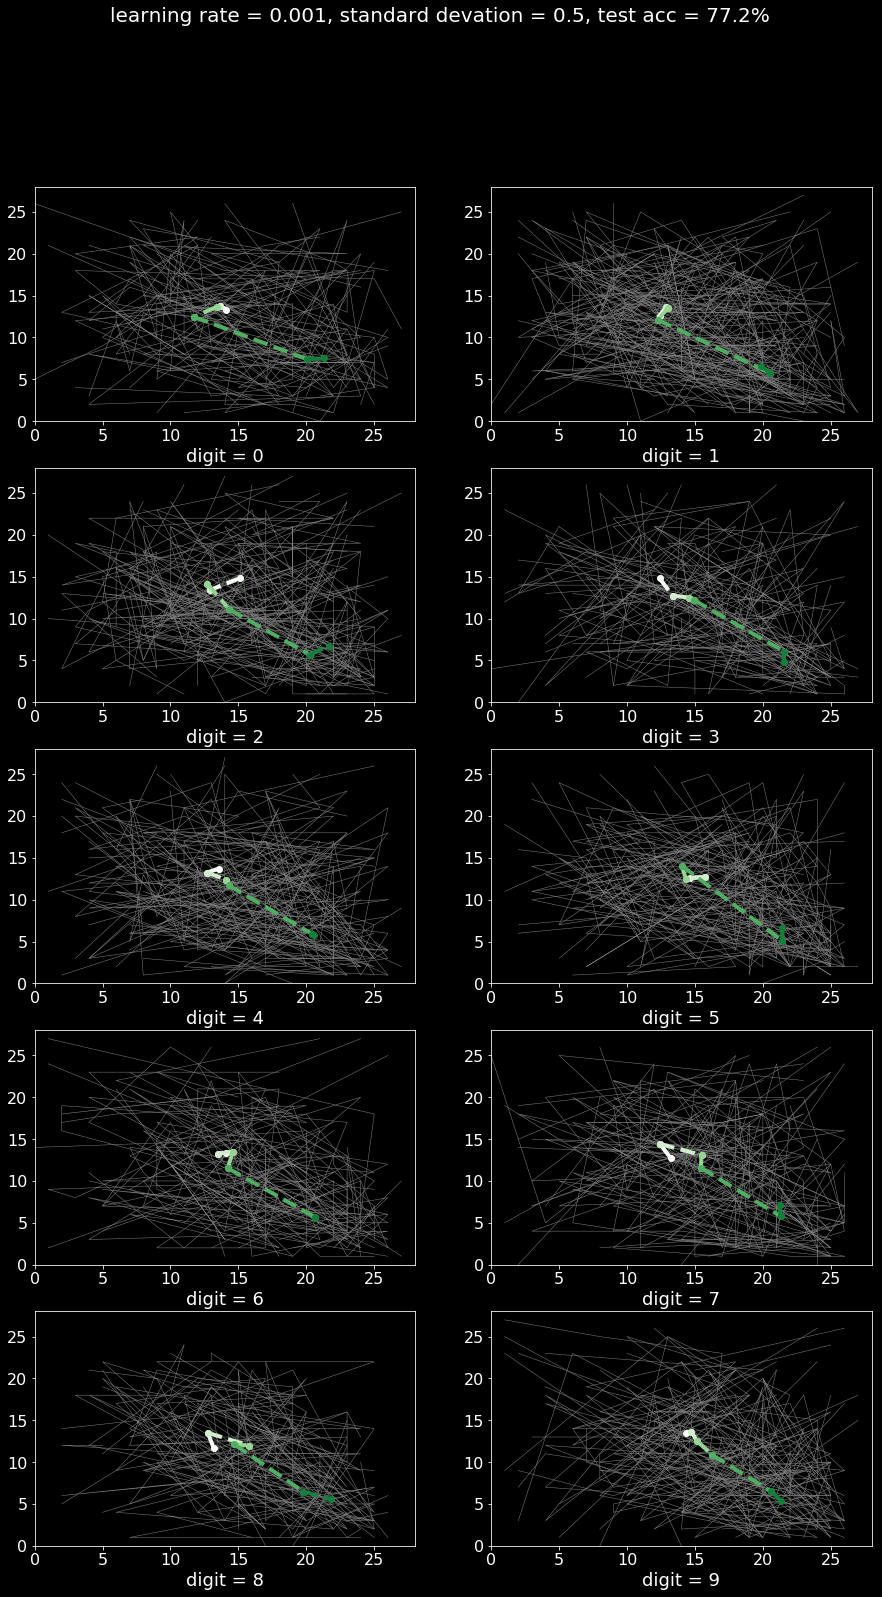

In [22]:
test_results = '/home/bart/Documents/data/RAM_output/RAM_results_190420_231456/test_results_190422_131904/replicate_2'
suptitle = "learning rate = 0.001, standard devation = 0.5, test acc = 77.2%"
save_as = "lr0.001_std0.5_testacc77.2.png"
behavior(test_results, suptitle, save_as)

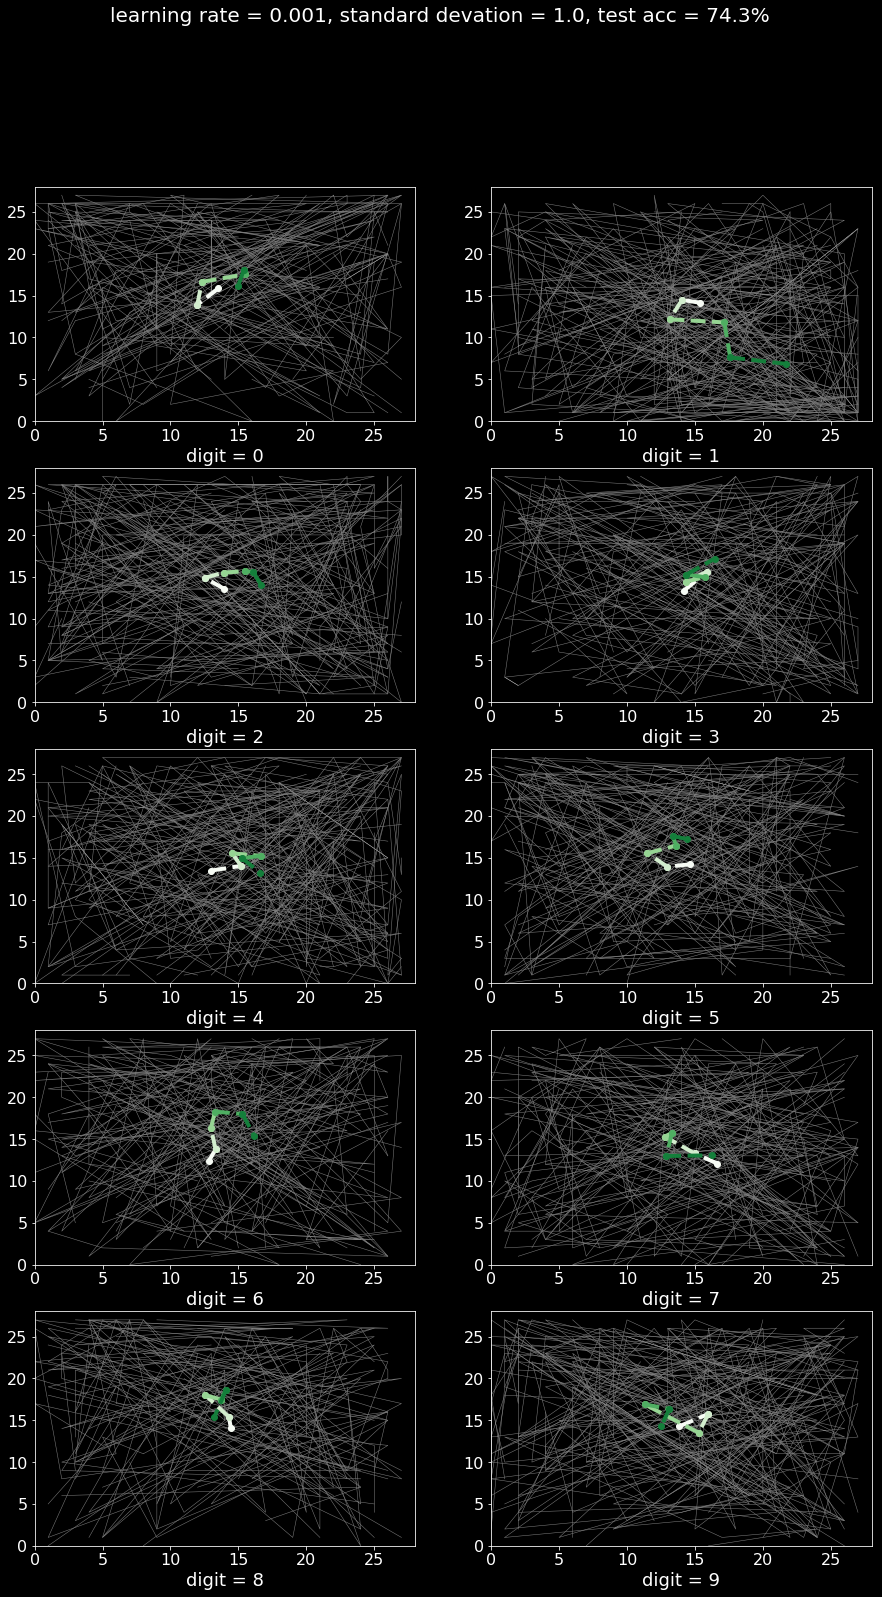

In [23]:
test_results = '/home/bart/Documents/data/RAM_output/RAM_results_190420_231619/test_results_190422_131951/replicate_1'
suptitle = "learning rate = 0.001, standard devation = 1.0, test acc = 74.3%"
save_as = "lr0.001_std1.0_testacc74.3.png"
behavior(test_results, suptitle, save_as)